In [32]:
%matplotlib inline

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import cv2

import glob

In [2]:
# wczytanie zdjęcia
img = cv2.imread("/Users/ela/Data Scientist - InfoshareAcademy/DL/fruit-recognition/Apple/Apple A/Apple 1.png")

<Figure size 1440x1440 with 0 Axes>

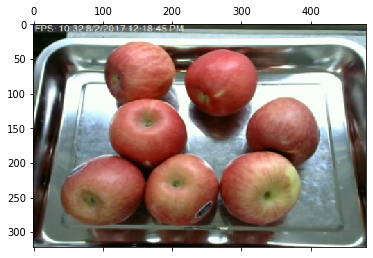

In [3]:
# Display the resulting frame
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
# plt.gray()
plt.matshow(img)
plt.show()

In [4]:
apple_a = glob.glob('/Users/ela/Data Scientist - InfoshareAcademy/DL/fruit-recognition/Apple/Apple A/*.png')

In [5]:
apple_e = glob.glob('/Users/ela/Data Scientist - InfoshareAcademy/DL/fruit-recognition/Apple/Apple E/*.png')

In [6]:
apples = apple_a + apple_e
n_apples = len(apples)
n_apples

1356

In [7]:
img_height, img_width = 150, 150

In [8]:
apples_array = np.empty((n_apples, img_height, img_width, 3))
apples_list = []

In [9]:
for i, path in enumerate(apples):
    image = cv2.imread(path)
    if image.shape[:-1] != (img_height, img_width):
        image = cv2.resize(image, (img_width, img_height))
        
    apples_array[i] = image

In [10]:
image

array([[[146, 152, 140],
        [154, 147, 141],
        [154, 152, 146],
        ...,
        [  3,  16,  14],
        [  2,  11,   9],
        [ 20,  34,  31]],

       [[116, 124, 116],
        [153, 148, 143],
        [146, 146, 140],
        ...,
        [  7,  18,  16],
        [  0,   7,   5],
        [  7,  19,  16]],

       [[ 71,  83,  79],
        [202, 202, 199],
        [190, 192, 186],
        ...,
        [ 59,  65,  63],
        [  3,   7,   6],
        [  4,   9,   8]],

       ...,

       [[ 71,  56,  32],
        [ 66,  54,  34],
        [ 68,  63,  44],
        ...,
        [157, 168, 164],
        [119, 130, 126],
        [106, 116, 112]],

       [[ 92,  64,  33],
        [ 80,  56,  28],
        [ 67,  48,  26],
        ...,
        [164, 172, 168],
        [132, 140, 137],
        [108, 115, 112]],

       [[145, 115,  82],
        [123,  95,  63],
        [ 91,  66,  42],
        ...,
        [177, 183, 179],
        [138, 143, 140],
        [114, 120, 116]]

In [11]:
for i, path in enumerate(apples):
    image = cv2.imread(path)
    if image.shape[:-1] != (img_height, img_width):
        image = cv2.resize(image, (img_width, img_height))
    apples_list.append(image)

In [12]:
len(apples_list)

1356

In [13]:
apples_array_bis = np.stack(apples_list)

In [14]:
apples_array_bis.shape

(1356, 150, 150, 3)

In [15]:
# przypisanie apple_array do x 
x = apples_array

In [16]:
x

array([[[[ 81.,  85.,  74.],
         [ 83.,  82.,  81.],
         [ 79.,  83.,  75.],
         ...,
         [  3.,  17.,  15.],
         [  3.,  17.,  14.],
         [  4.,  18.,  15.]],

        [[ 83.,  84.,  73.],
         [156., 160., 152.],
         [165., 169., 165.],
         ...,
         [  5.,  19.,  16.],
         [  3.,  17.,  15.],
         [ 22.,  36.,  34.]],

        [[ 79.,  83.,  67.],
         [150., 179., 179.],
         [ 84.,  90.,  84.],
         ...,
         [  5.,  21.,  17.],
         [ 11.,  25.,  21.],
         [ 26.,  41.,  37.]],

        ...,

        [[ 34.,  39.,  32.],
         [ 40.,  42.,  41.],
         [ 45.,  47.,  55.],
         ...,
         [ 55.,  60.,  42.],
         [ 62.,  68.,  50.],
         [ 70.,  76.,  59.]],

        [[ 61.,  66.,  59.],
         [ 55.,  56.,  57.],
         [ 53.,  54.,  63.],
         ...,
         [ 51.,  54.,  36.],
         [ 60.,  61.,  44.],
         [ 70.,  71.,  53.]],

        [[ 65.,  69.,  63.],
       

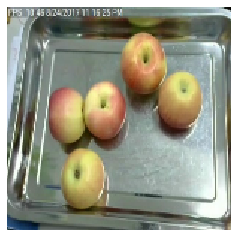

In [17]:
img = cv2.cvtColor(apples_array_bis[1000], cv2.COLOR_BGR2RGB)
plt.matshow(img)
plt.axis('off')
plt.show()

In [18]:
applesPaths = [apple_a, apple_e]

In [19]:
# wyrzucamy, bo nie wiemy jaki jest cel tego 
# x = np.zeros((1356, 150, 150, 3)) 
y = np.zeros(1356,)

In [20]:
idx = 0
for i in range(len(applesPaths)):
    appleClass = i
    for path in applesPaths[i]:
        # wczytywanie
        # x mamy już gotowy wyżej, dlatego wyrzucone
       # x[idx] = n_apples
        y[idx] = appleClass
        idx += 1

In [21]:
print(x.shape)
y.shape

(1356, 150, 150, 3)


(1356,)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42, stratify=y)

In [42]:
print('x_train shape', x_train.shape)
print('x_test shape', x_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

x_train shape (1017, 150, 150, 3)
x_test shape (339, 150, 150, 3)
y_train shape (1017,)
y_test shape (339,)


In [43]:
# normalizacja na liczby w zakresie 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [44]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

In [45]:
from sklearn.preprocessing import OneHotEncoder

# transformujemy y_test
y_test = OneHotEncoder().fit_transform(y_test.reshape(-1,1)).toarray()
# podglądamy
y_test = y_test.astype(np.float32)

# transformujemy y_train
y_train = OneHotEncoder().fit_transform(y_train.reshape(-1,1)).toarray()
# podglądamy
y_train = y_train.astype(np.float32)

print("y_test.shape: ", y_test.shape)
print("y_train.shape: ", y_train.shape)

y_test.shape:  (339, 2)
y_train.shape:  (1017, 2)


In [46]:
# badamy ile jest x
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (1017, 150, 150, 3)
x_test shape:  (339, 150, 150, 3)


Label:  1


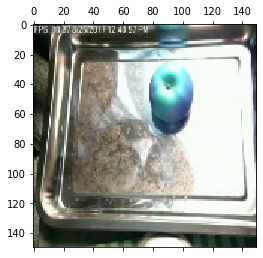

In [57]:
# podgląd x - zdjęcia
n = 100
plt.matshow(x_train[n])
print("Label: ", np.argmax(y_train[n]))